In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock
from datetime import datetime, timedelta

In [63]:
market_cap_trend_df = pd.read_csv('./data/증시자금추이.csv', encoding='EUC-KR')
market_cap_trend_df.head(3)

,구 분,투자자예탁금\n(장내파생상품 \n 거래예수금제외),장내파생상품 \n거래 예수금,대고객 환매 \n조건부 채권(RP) \n매도잔고,위탁매매 미수금,위탁매매 미수금 \n대비 실제 \n반대매매금액,미수금 대비 \n반대매매비중(%)
0,2023/04/26,"53,487,909","12,062,271","76,605,503","271,116","35,074",13.7
1,2023/04/25,"53,771,676","12,184,603","76,435,711","256,854","19,366",8.1
2,2023/04/24,"53,347,497","12,300,099","77,049,987","239,840","16,064",7.1


In [64]:
market_cap_trend_df.index = pd.to_datetime(market_cap_trend_df['구 분'])
market_cap_trend_df.drop(labels = ['구 분'], axis=1, inplace=True)
market_cap_trend_df.head(3)

,투자자예탁금\n(장내파생상품 \n 거래예수금제외),장내파생상품 \n거래 예수금,대고객 환매 \n조건부 채권(RP) \n매도잔고,위탁매매 미수금,위탁매매 미수금 \n대비 실제 \n반대매매금액,미수금 대비 \n반대매매비중(%)
구 분,,,,,,
2023-04-26,"53,487,909","12,062,271","76,605,503","271,116","35,074",13.7
2023-04-25,"53,771,676","12,184,603","76,435,711","256,854","19,366",8.1
2023-04-24,"53,347,497","12,300,099","77,049,987","239,840","16,064",7.1


In [66]:
market_cap_trend_df.sort_index(inplace=True)
market_cap_trend_df.head(3)

,투자자예탁금\n(장내파생상품 \n 거래예수금제외),장내파생상품 \n거래 예수금,대고객 환매 \n조건부 채권(RP) \n매도잔고,위탁매매 미수금,위탁매매 미수금 \n대비 실제 \n반대매매금액,미수금 대비 \n반대매매비중(%)
구 분,,,,,,
2022-01-03,"71,732,752","10,756,972","87,515,610","271,705","16,868",5.3
2022-01-04,"66,570,238","11,025,304","89,870,737","224,259","21,079",7.8
2022-01-05,"68,986,142","11,134,306","90,018,209","258,912","17,434",7.8


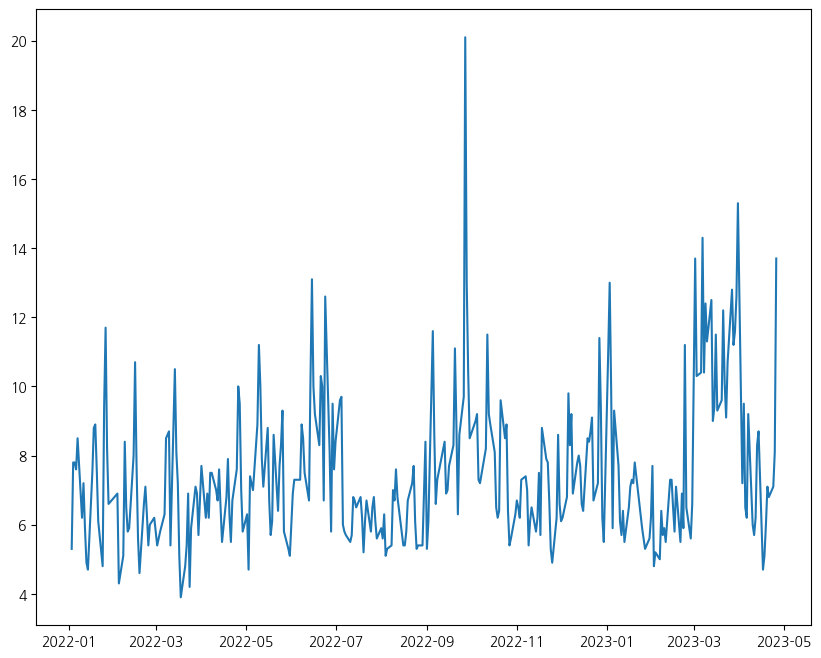

In [68]:
plt.figure(figsize=(10, 8))
plt.plot(market_cap_trend_df.index, market_cap_trend_df['미수금 대비 \n반대매매비중(%)'])
plt.show()

In [75]:
start_date = market_cap_trend_df.index[0].strftime('%Y%m%d')
end_date = market_cap_trend_df.index[-1].strftime('%Y%m%d')

In [78]:
# 시작일과 종료일 설정
#start_date = '20220428'
#end_date = '20230427'

# 해당 기간 동안의 코스피 지수를 읽어옵니다.
df = stock.get_index_ohlcv_by_date(start_date, end_date, "1001")

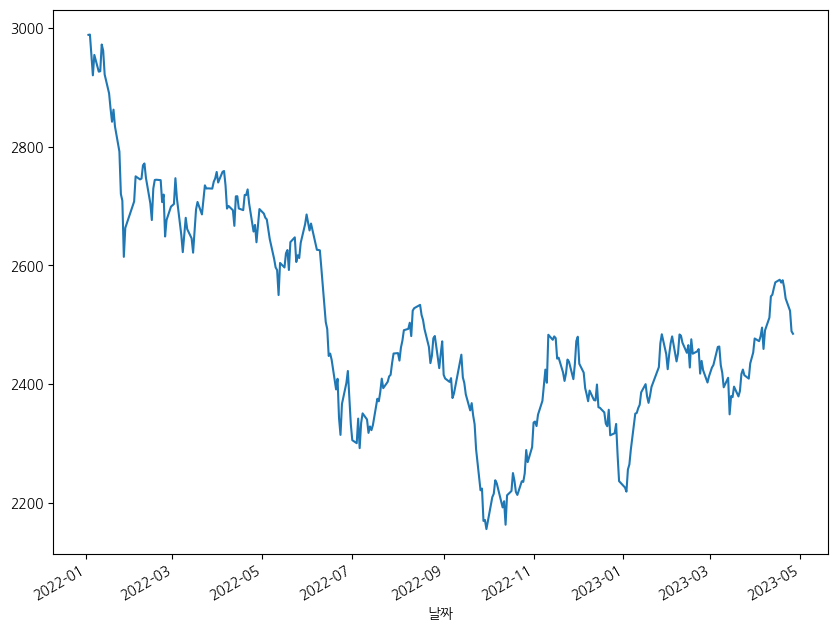

In [77]:
# 종가 칼럼을 선택하여 그래프를 그립니다.
plt.figure(figsize=(10, 8))
df['종가'].plot()
plt.show()

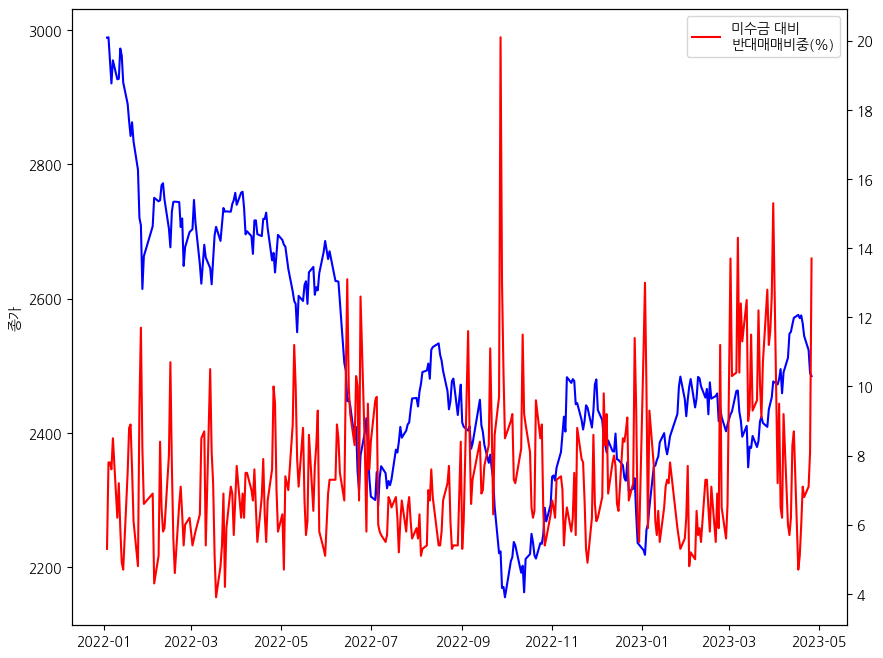

In [82]:
"""
가격, 반대매매 같이 그리기
"""

fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.plot(df.index, df['종가'], color='blue', label='코스피 지수')
ax1.set_ylabel('종가', color='black')

# 오른쪽 축에 반대매매 그리기
ax2 = ax1.twinx()
#ax2.plot(df.index, df['drawdown'], color='red', label='DD')
ax2.plot(market_cap_trend_df.index, market_cap_trend_df['미수금 대비 \n반대매매비중(%)'], color='red', label='미수금 대비 \n반대매매비중(%)')

plt.autoscale(enable=True, axis='x', tight=True)
plt.legend()
plt.show()

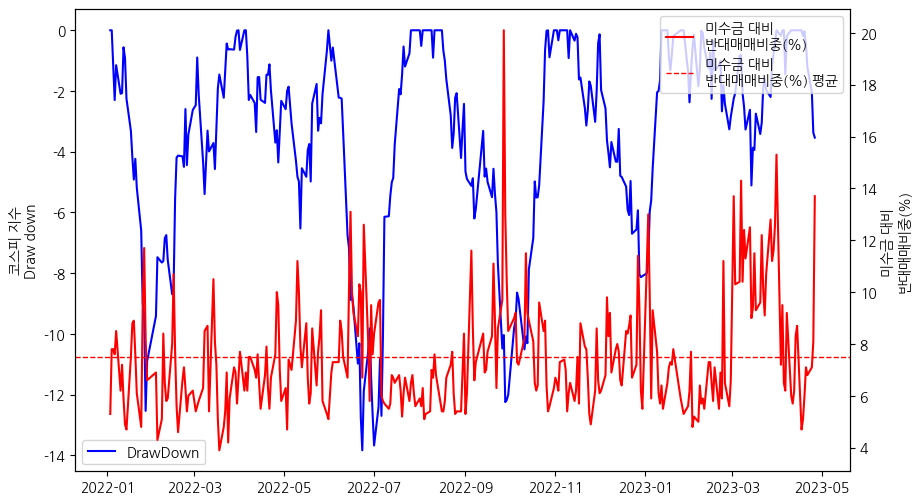

In [99]:
"""
가격 DrawDown, 반대매매 같이 그리기
"""

fig, ax1 = plt.subplots(figsize=(10, 6))
#ax1.plot(df.index, df['종가'], color='blue', label='코스피 지수')
ax1.set_ylabel('코스피 지수\nDraw down', color='black')

window_size = 20
df['rolling_max'] = df['종가'].rolling(window_size, min_periods=1).max()
df['drawdown'] = (df['종가']/df['rolling_max'] - 1) * 100
ax1.plot(df.index, df['drawdown'], color='blue', label='DrawDown')
ax1.legend(loc='best')

# 오른쪽 축에 반대매매 그리기
ax2 = ax1.twinx()
#ax2.plot(df.index, df['drawdown'], color='red', label='DD')
ax2.plot(market_cap_trend_df.index, market_cap_trend_df['미수금 대비 \n반대매매비중(%)'], color='red', label='미수금 대비\n반대매매비중(%)')
ax2.set_ylabel('미수금 대비 \n반대매매비중(%)')
ax2.axhline(y=market_cap_trend_df['미수금 대비 \n반대매매비중(%)'].mean(), color='r', linestyle='--', linewidth=1, label='미수금 대비\n반대매매비중(%) 평균')
ax2.legend(loc='best')

plt.autoscale(enable=True, axis='x', tight=True)
#plt.legend()
plt.show()

In [105]:
# 해당 기간 동안의 코스피 per을 읽어옵니다.
index_fundamental_df = stock.get_index_fundamental(start_date, end_date, '1001')
index_fundamental_df.head(3)

,종가,등락률,PER,선행PER,PBR,배당수익률
날짜,,,,,,
2022-01-03,2988.77,0.37,12.76,0.0,1.15,1.82
2022-01-04,2989.24,0.02,12.76,0.0,1.15,1.82
2022-01-05,2953.97,-1.18,12.61,0.0,1.13,1.84


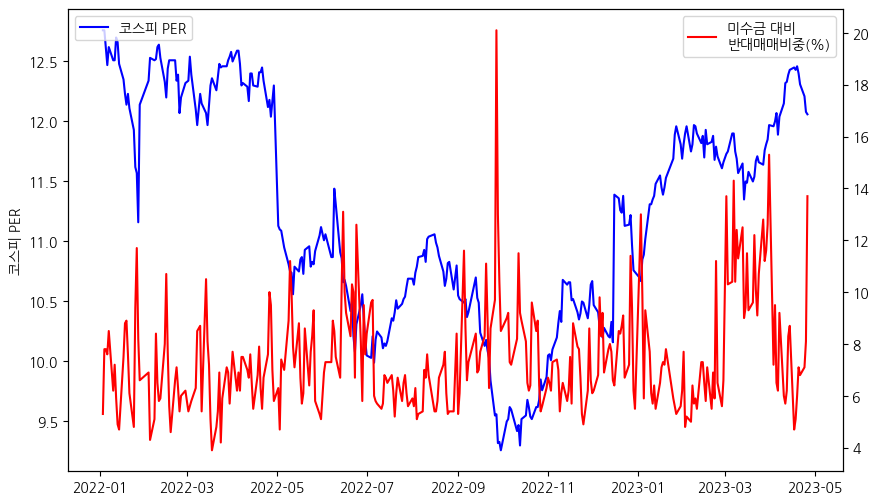

In [110]:
"""
가격, 반대매매 같이 그리기
"""

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df.index, index_fundamental_df['PER'], color='blue', label='코스피 PER')
ax1.set_ylabel('코스피 PER', color='black')
ax1.legend(loc='upper left')

# 오른쪽 축에 반대매매 그리기
ax2 = ax1.twinx()
#ax2.plot(df.index, df['drawdown'], color='red', label='DD')
ax2.plot(market_cap_trend_df.index, market_cap_trend_df['미수금 대비 \n반대매매비중(%)'], color='red', label='미수금 대비 \n반대매매비중(%)')
ax2.legend(loc='best')

plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

참고

https://scribblinganything.tistory.com/382

In [90]:
market_cap_trend_df['미수금 대비 \n반대매매비중(%)'].mean()

7.496941896024463

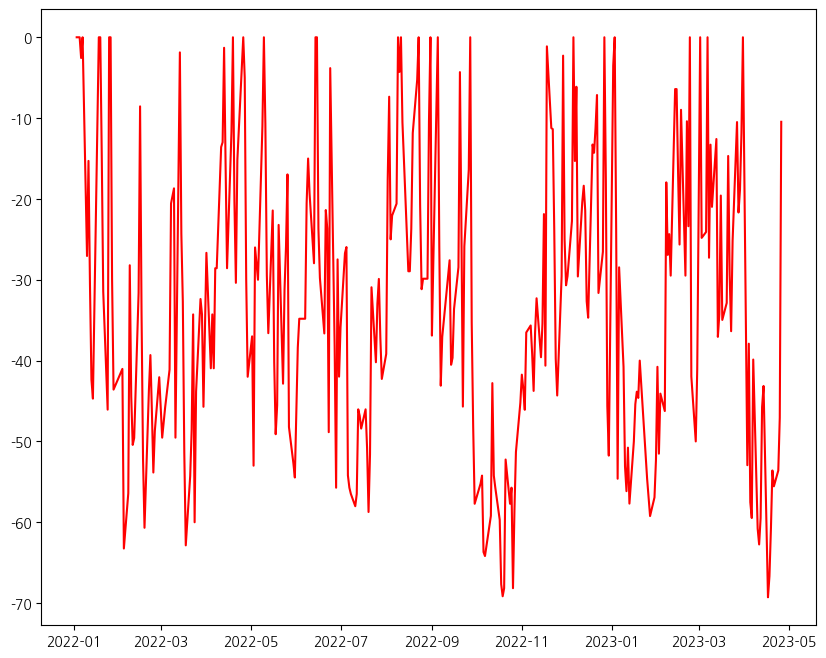

In [71]:
plt.figure(figsize=(10, 8))
window_size = 20
market_cap_trend_df['rolling_max'] = market_cap_trend_df['미수금 대비 \n반대매매비중(%)'].rolling(window_size, min_periods=1).max()
market_cap_trend_df['drawdown'] = (market_cap_trend_df['미수금 대비 \n반대매매비중(%)']/market_cap_trend_df['rolling_max'] - 1) * 100
plt.plot(market_cap_trend_df.index, market_cap_trend_df['drawdown'], color='red', label='DD')
plt.show()

In [56]:
market_cap_trend_df

,구 분,투자자예탁금\n(장내파생상품 \n 거래예수금제외),장내파생상품 \n거래 예수금,대고객 환매 \n조건부 채권(RP) \n매도잔고,위탁매매 미수금,위탁매매 미수금 \n대비 실제 \n반대매매금액,미수금 대비 \n반대매매비중(%),rolling_max,drawdown
0,2023/04/26,"53,487,909","12,062,271","76,605,503","271,116","35,074",13.7,13.7,NaN
1,2023/04/25,"53,771,676","12,184,603","76,435,711","256,854","19,366",8.1,13.7,NaN
2,2023/04/24,"53,347,497","12,300,099","77,049,987","239,840","16,064",7.1,13.7,NaN
3,2023/04/21,"53,200,764","12,207,994","76,900,516","227,446","15,504",6.8,13.7,NaN
4,2023/04/20,"52,647,865","12,094,610","76,546,491","227,891","14,251",7.1,13.7,NaN
...,...,...,...,...,...,...,...,...,...
322,2022/01/07,"65,204,675","11,532,553","90,606,013","391,436","23,179",8.5,8.5,NaN
323,2022/01/06,"67,356,392","11,632,746","90,362,249","273,149","19,603",7.6,8.5,NaN
324,2022/01/05,"68,986,142","11,134,306","90,018,209","258,912","17,434",7.8,8.5,NaN
325,2022/01/04,"66,570,238","11,025,304","89,870,737","224,259","21,079",7.8,8.5,NaN


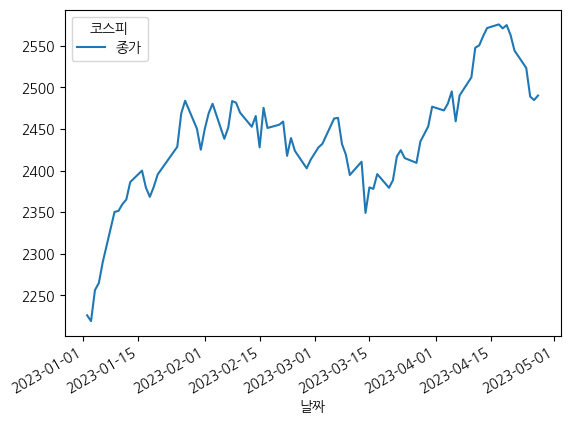

In [17]:
"""
종가, DrawDown 그리기
"""

fig, ax1 = plt.subplots()
ax1.plot(df.index, df['종가'], color='black', label='Price')
ax1.set_ylabel('종가', color='black')

# 오른쪽 축에 상승/하락을 표시합니다.
ax2 = ax1.twinx()

# 종가 그래프를 그립니다.
#ax.plot(df.index, df['종가'], color='black')

window_size = 20
df['rolling_max'] = df['종가'].rolling(window_size, min_periods=1).max()
df['drawdown'] = (df['종가']/df['rolling_max'] - 1) * 100
ax2.plot(df.index, df['drawdown'], color='red', label='DD')
#ax2.plot(df.index, df['drawdown'], color='red', alpha=0.3, label='DD')

plt.autoscale(enable=True, axis='x', tight=True)
plt.legend()
plt.show()

In [20]:
max_drawdown

코스피
종가    0.054368
dtype: float64

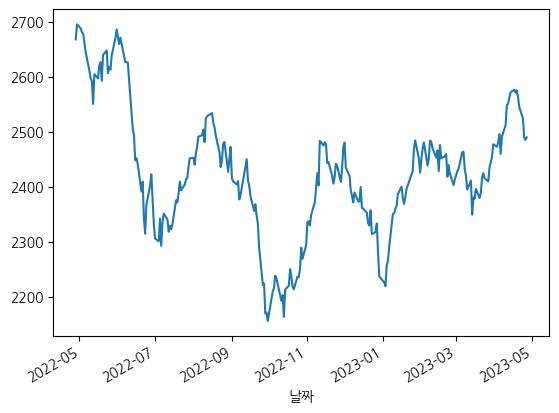

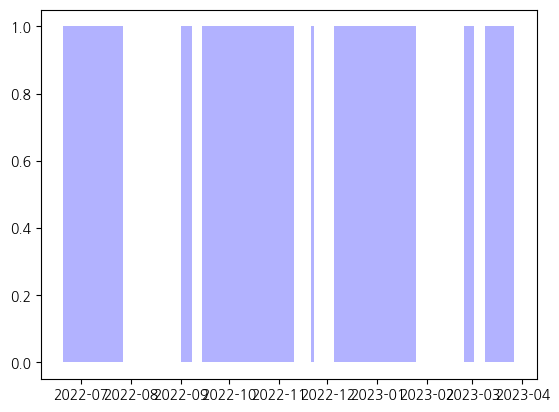

In [25]:
# 전고점 대비 저점이 10% 이상 하락했거나 전저점 대비 10%이상 상승한 기간을 모두 찾고 그래프에 표시합니다.
df['전고점'] = df['고가'].cummax()
df['전저점'] = df['저가'].cummin()
df['변동률'] = (df['종가'] - df['전고점']) / df['전고점'] * 100
df['하락'] = df['변동률'] <= -10
plt.fill_between(df.index, 0, df['하락'], where=df['하락'], facecolor='blue', alpha=0.3)


plt.show()


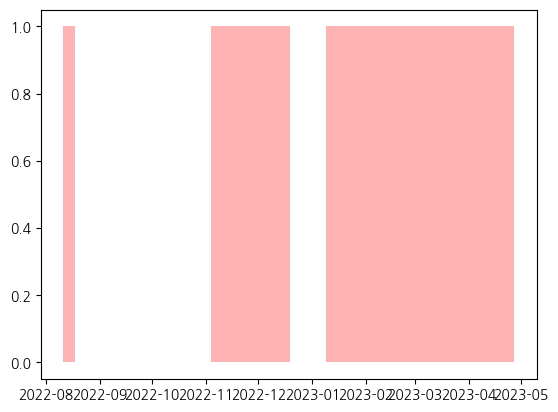

In [27]:
df['변동률2'] = (df['종가'] - df['전저점']) / df['전저점'] * 100
df['상승'] = df['변동률2'] >= 10
plt.fill_between(df.index, 0, df['상승'], where=df['상승'], facecolor='red', alpha=0.3)


plt.show()

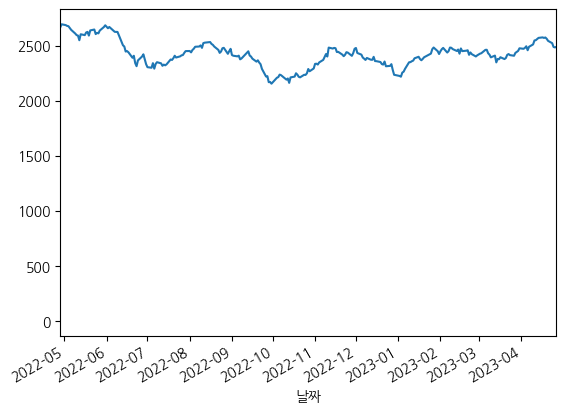

In [29]:
# 종가 칼럼을 선택하여 그래프를 그립니다.
df['종가'].plot()

# 전고점 대비 저점이 10% 이상 하락했거나 전저점 대비 10%이상 상승한 기간을 모두 찾고 그래프에 표시합니다.
df['전고점'] = df['고가'].cummax()
df['전저점'] = df['저가'].cummin()
df['변동률'] = (df['종가'] - df['전고점']) / df['전고점'] * 100
df['하락'] = df['변동률'] <= -10
plt.fill_between(df.index, 0, df['하락'], where=df['하락'], facecolor='blue', alpha=0.3)

df['변동률'] = (df['종가'] - df['전저점']) / df['전저점'] * 100
df['상승'] = df['변동률'] >= 10
plt.fill_between(df.index, 0, df['상승'], where=df['상승'], facecolor='red', alpha=0.3)

plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

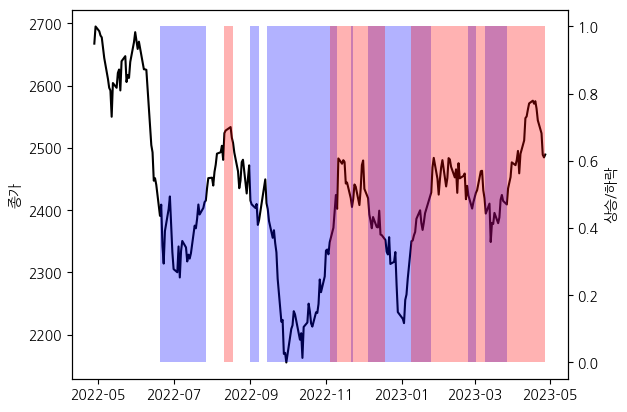

In [31]:

fig, ax1 = plt.subplots()
ax1.plot(df.index, df['종가'], color='black')
ax1.set_ylabel('종가', color='black')

# 오른쪽 축에 상승/하락을 표시합니다.
ax2 = ax1.twinx()
df['전고점'] = df['고가'].cummax()
df['전저점'] = df['저가'].cummin()
df['변동률'] = (df['종가'] - df['전고점']) / df['전고점'] * 100
df['하락'] = df['변동률'] <= -10
ax2.fill_between(df.index, 0, df['하락'], where=df['하락'], facecolor='blue', alpha=0.3)

df['변동률'] = (df['종가'] - df['전저점']) / df['전저점'] * 100
df['상승'] = df['변동률'] >= 10
ax2.fill_between(df.index, 0, df['상승'], where=df['상승'], facecolor='red', alpha=0.3)

ax2.set_ylabel('상승/하락', color='black')

plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

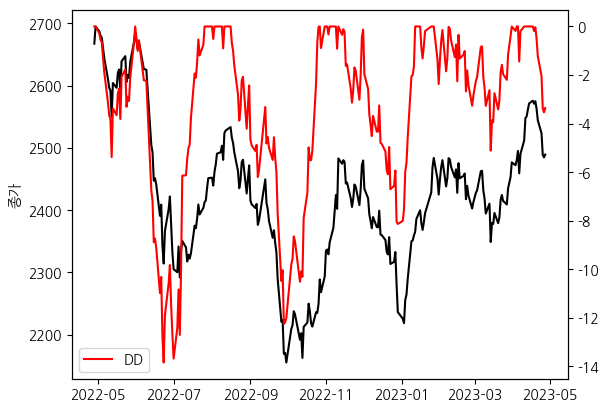

In [5]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'cmr10',
 'cmb10',
 'DejaVu Serif Display',
 'STIXNonUnicode',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'cmex10',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'cmss10',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'DejaVu Sans Display',
 'DejaVu Serif',
 'cmsy10',
 'DejaVu Serif',
 'cmtt10',
 'DejaVu Sans',
 'STIXSizeFiveSym',
 'STIXSizeFourSym',
 'cmmi10',
 'STIXGeneral',
 'Comic Sans MS',
 'Corbel',
 'Microsoft JhengHei',
 'Candara',
 'Euphorigenic',
 'Times New Roman',
 'Tahoma',
 'Quicksand',
 'Hancom MalangMalang',
 'HCR Dotum',
 'Cabin Sketch',
 'Segoe UI',
 'Franklin Gothic Medium',
 'Constantia',
 'Microsoft Tai Le',
 'Ubuntu Mono',
 'Consolas',
 'Noto Sans',
 'Segoe UI',
 'Segoe UI Historic',
 'Lemon

In [8]:
plt.rcParams['font.family'] = 'NanumGothic'